# NLTK Tutorial
nltk is one of most famous NLP text processing library in python and it provides easy-to-use interfaces to a number of different resources and algorithms. The 15688 class covers a very small protition of the powerful nltk library and in this tutorial, we will go through some of the other basic usages and functionalities of it.



## Start
NLTK provides various built-in text materials, for instance, books, web text, brown sents etc. We can easily import these texts.


In [1]:
import nltk
# nltk.download() # Download all the resource of nltk

# Import all the book dataset
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


All the book above are stored in `nltk.Text` object. We can also build our own `Text` object from raw strings.

In [2]:
from nltk.corpus import webtext
firefox_txt = Text(nltk.word_tokenize(webtext.raw('firefox.txt')))
print firefox_txt[:100]

[u'Cookie', u'Manager', u':', u'``', u'Do', u"n't", u'allow', u'sites', u'that', u'set', u'removed', u'cookies', u'to', u'set', u'future', u'cookies', u"''", u'should', u'stay', u'checked', u'When', u'in', u'full', u'screen', u'mode', u'Pressing', u'Ctrl-N', u'should', u'open', u'a', u'new', u'browser', u'when', u'only', u'download', u'dialog', u'is', u'left', u'open', u'add', u'icons', u'to', u'context', u'menu', u'So', u'called', u'``', u'tab', u'bar', u"''", u'should', u'be', u'made', u'a', u'proper', u'toolbar', u'or', u'given', u'the', u'ability', u'collapse', u'/', u'expand', u'.', u'[', u'XUL', u']', u'Implement', u'Cocoa-style', u'toolbar', u'customization', u'.', u'#', u'ifdefs', u'for', u'MOZ_PHOENIX', u'customize', u'dialog', u"'s", u'toolbar', u'has', u'small', u'icons', u'when', u'small', u'icons', u'is', u'not', u'checked', u'nightly', u'builds', u'and', u'tinderboxen', u'for', u'Phoenix', u'finish', u'tearing', u'prefs', u'UI', u'to']


## Text search
The `Text` object provides some useful apis.

In [3]:
# text concordance
firefox_txt.concordance("javascript")

Displaying 25 of 200 matches:
 folder called New Folder [ Moz ] JavaScript error when hitting Cancel in Add 
og Choosing Expand on PT produces JavaScript error '' Opens a new window '' to
s visible when opening a window . javascript click ( ) fails to activate links
bled 256 colors theme Can not use Javascript to add new side bar Save Page As 
 an image crashes pheonix ( 0.2 ) javascript onLoad Pageload and startup spike
 from bookmark menu ( not panel ) Javascript prefs are always blank [ cust ] D
ot start due to script name clash Javascript should be JavaScript additional t
t name clash Javascript should be JavaScript additional toolbars show up on po
get cut off . XBL loading issue . JavaScript in Phoenix 0.2 different from Moz
ses its value when selecting Text Javascript error : uncaught exception while 
oads itself Add option to prevent javascript from resizing the browser crash u
w any information page containing javascript newsticker cause Phoenix 0.3 to a
wap not working ( OK i

Concordance index displays the occurance of the specified word, together with the context.
Also, we can easily analyze the context where a word is used. If two words are high frequently used within the same context, they can be regarded as synonyms.

And by importing `nltk.books`, all the text of books are stored in variable `text1` -- `text9`. Let's explore around some text searching functionalities based on these books. （let's try text1, as I love the book :）


In [4]:
print text1

print 'Similar words to monstrous in Moby Dick:'
text1.similar('monstrous')
print '\nSimilar words to monstrous in Sense and Sensibility:'
text2.similar('very')
print '\nSimilar usage(context) of word monstrous and very in text2:'
text2.common_contexts(['monstrous', 'very'])

<Text: Moby Dick by Herman Melville 1851>
Similar words to monstrous in Moby Dick:
imperial subtly impalpable pitiable curious abundant perilous
trustworthy untoward singular lamentable few determined maddens
horrible tyrannical lazy mystifying christian exasperate

Similar words to monstrous in Sense and Sensibility:
so as too a not monstrous last more was how most exceedingly the only
first her perfectly cottage will it

Similar usage(context) of word monstrous and very in text2:
a_pretty is_pretty a_lucky am_glad be_glad


In [5]:
# Find all the collocations from the text
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [6]:
plt = firefox_txt.dispersion_plot(['firefox', 'chrome', 'IE', 'opera', 'safari'])

`dispersion_plot` indicates the number of words in front of a word. The y-axis stands for words while x-axis is the whole text/book. In the figure above we see lots of occurance of whales, since this is a book about whales.

We can gather useful information with the dispersion plots. For instance:

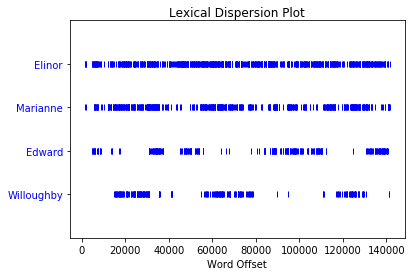

In [7]:
pl2 = text2.dispersion_plot(['Elinor','Marianne','Edward','Willoughby']) 

We can see that the name of two male leads are far more frequent than female ones, which reveals the dominance position of men in those ages.

## Tokenization & Normalization
NLTk provides more built-in tokenization strategies than covered in the homework.

In [8]:
text = "this's a test. We just write some random words here? with some ++ punctuations. insi-de."
from nltk.tokenize import sent_tokenize
sentence_tokenize_list = sent_tokenize(text)
print sentence_tokenize_list

["this's a test.", 'We just write some random words here?', 'with some ++ punctuations.', 'insi-de.']


In [9]:
text = "this's a test. We just write some random words here ? with some++ punctuations. insi-de."
print sent_tokenize(text)

["this's a test.", 'We just write some random words here ?', 'with some++ punctuations.', 'insi-de.']


Above is the sentence tokenization feature, which make use of the ending punctuations(, . ? etc.) to find the end of a sentence. In fact according to the doc, `sent_tokenize` take advantage of an instance of `PunktSentenceTokenizer` from the `nltk`, which has been well trained and is smart enough to find out the punctuation and characters marking the end of a raw sentence.



In [10]:
from nltk.tokenize import word_tokenize
print word_tokenize("This's is a test' with punc-in-mid cost $3.88 and even\nnew line")

from nltk.tokenize import TreebankWordTokenizer
print TreebankWordTokenizer().tokenize("This's is a test' with punc-in-mid cost $3.88 and even\nnew line")

from nltk.tokenize import WordPunctTokenizer
print WordPunctTokenizer().tokenize("This's is a test' with punc-in-mid cost $3.88 and even\nnew line")


['This', "'s", 'is', 'a', 'test', "'", 'with', 'punc-in-mid', 'cost', '$', '3.88', 'and', 'even', 'new', 'line']
['This', "'s", 'is', 'a', 'test', "'", 'with', 'punc-in-mid', 'cost', '$', '3.88', 'and', 'even', 'new', 'line']
['This', "'", 's', 'is', 'a', 'test', "'", 'with', 'punc', '-', 'in', '-', 'mid', 'cost', '$', '3', '.', '88', 'and', 'even', 'new', 'line']


Normalizing a text refers to striping the prefix/affixes of the words and provide a consistence word for future porcessing. One possible processing step is stemming.

In [11]:
trump_text = "Friends, delegates and fellow Americans: I humbly and gratefully accept your nomination for the presidency of the United States.Together, we will lead our party back to the White House, and we will lead our country back to safety, prosperity, and peace. We will be a country of generosity and warmth. But we will also be a country of law and order."
tokens = word_tokenize(trump_text)
print tokens
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

['Friends', ',', 'delegates', 'and', 'fellow', 'Americans', ':', 'I', 'humbly', 'and', 'gratefully', 'accept', 'your', 'nomination', 'for', 'the', 'presidency', 'of', 'the', 'United', 'States.Together', ',', 'we', 'will', 'lead', 'our', 'party', 'back', 'to', 'the', 'White', 'House', ',', 'and', 'we', 'will', 'lead', 'our', 'country', 'back', 'to', 'safety', ',', 'prosperity', ',', 'and', 'peace', '.', 'We', 'will', 'be', 'a', 'country', 'of', 'generosity', 'and', 'warmth', '.', 'But', 'we', 'will', 'also', 'be', 'a', 'country', 'of', 'law', 'and', 'order', '.']


In [12]:
print [porter.stem(t) for t in tokens]

[u'Friend', u',', u'deleg', u'and', u'fellow', u'American', u':', u'I', u'humbl', u'and', u'grate', u'accept', u'your', u'nomin', u'for', u'the', u'presid', u'of', u'the', u'Unit', u'States.Togeth', u',', u'we', u'will', u'lead', u'our', u'parti', u'back', u'to', u'the', u'White', u'Hous', u',', u'and', u'we', u'will', u'lead', u'our', u'countri', u'back', u'to', u'safeti', u',', u'prosper', u',', u'and', u'peac', u'.', u'We', u'will', u'be', u'a', u'countri', u'of', u'generos', u'and', u'warmth', u'.', u'But', u'we', u'will', u'also', u'be', u'a', u'countri', u'of', u'law', u'and', u'order', u'.']


In [13]:
print [lancaster.stem(t) for t in tokens]

['friend', ',', 'deleg', 'and', 'fellow', 'am', ':', 'i', 'humbl', 'and', 'grat', u'acceiv', 'yo', 'nomin', 'for', 'the', u'presid', 'of', 'the', 'unit', 'states.together', ',', 'we', 'wil', 'lead', 'our', 'party', 'back', 'to', 'the', 'whit', 'hous', ',', 'and', 'we', 'wil', 'lead', 'our', 'country', 'back', 'to', 'saf', ',', 'prosp', ',', 'and', 'peac', '.', 'we', 'wil', 'be', 'a', 'country', 'of', 'generos', 'and', 'warm', '.', 'but', 'we', 'wil', 'also', 'be', 'a', 'country', 'of', 'law', 'and', 'ord', '.']


Another part of normalization refers to lemmatize that has already been covered in the class homework: `Lemmatization`

In [14]:
wnl = nltk.WordNetLemmatizer()
print [wnl.lemmatize(t) for t in tokens]

['Friends', ',', u'delegate', 'and', 'fellow', 'Americans', ':', 'I', 'humbly', 'and', 'gratefully', 'accept', 'your', 'nomination', 'for', 'the', 'presidency', 'of', 'the', 'United', 'States.Together', ',', 'we', 'will', 'lead', 'our', 'party', 'back', 'to', 'the', 'White', 'House', ',', 'and', 'we', 'will', 'lead', 'our', 'country', 'back', 'to', 'safety', ',', 'prosperity', ',', 'and', 'peace', '.', 'We', 'will', 'be', 'a', 'country', 'of', 'generosity', 'and', 'warmth', '.', 'But', 'we', 'will', 'also', 'be', 'a', 'country', 'of', 'law', 'and', 'order', '.']


In contrast to stemming methods above, lemmatizers only removes the affixes if the resulting words in in the dictionary. In the example, we see word 'delegates' is stemmed to 'deleg' by the stemmer while in lemmatizer, it becomes 'delegate'. What's more, lemmatizer will automatically handle other cases, say: women -> woman. Generally it provides better performances. As a result, as you might have already noticed, it takes far longer time to run.

Unfortunately, for tokenization on international(non latin languages), say Chinese, nltk's support is far from satisfied. We may use some third-party tools to do the tokenization and normalization part and feed the result set to nltk afterwards for further processing. 

You may skip the following part if you are not intersted in segementing/tokenzing Chinese characters, but it will be very concise. Personally, I love the [jieba](https://github.com/fxsjy/jieba) package.

In [15]:
import jieba
print '/'.join(jieba.cut("这学期我上了一门数据科学课，还是挺有意思的啊。"))
print '/'.join(jieba.cut("苟利国家生死以，岂因祸福避趋之。", cut_all=False))

Building prefix dict from /Library/Python/2.7/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/j3/p60cssg12z31dh542s10lkx80000gn/T/jieba.cache
Loading model cost 0.998705863953 seconds.
Prefix dict has been built succesfully.


这/学期/我/上/了/一门/数据/科学课/，/还是/挺/有意思/的/啊/。
苟利国家生死以/，/岂因祸福避趋之/。


## Probability Analysis
In this section, we will discuss some probability analysis using nltk. For a language set, you may want to do some probability analysis and thus making prediction/understanding context based on it. 

In [16]:
from nltk.probability import *

freq = FreqDist(text1)
print freq.B()
print freq['whale']
print freq.freq('whale')

19317
906
0.00347367331368


`nltk.probability.FreqDist` is actually a subclass of `collections.Counter` and the difference is that the `Counter` only gives the count of each word while `FreqDist` can be used to obtain the frequency distribution. As written in the doc 
> A frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome.

This extra step of initialization will bring extra time cost on large corpus. We can see the difference:


In [17]:
from timeit import Timer
from collections import Counter

t1 = Timer(lambda: FreqDist((text1)))
t2 = Timer(lambda: FreqDist((text1)))

print t1.timeit(number=5)
print t2.timeit(number=5)


3.78636097908
4.21324896812


And we can make use of the conditional frequency distribution to do some interesting work, say find the length of all words starting with certain characters:

In [18]:
cf = ConditionalFreqDist()
for word in text1:
    cf[word[0]][len(word)] += 1
    
for c in sorted(cf.conditions())[-15:]:
    print "Starting with %s:" % c,
    for length in range(3,8):
        print "length %d:%.3f," % (length,cf[c].freq(length)),
    print

Starting with k: length 3:0.017, length 4:0.527, length 5:0.219, length 6:0.089, length 7:0.095,
Starting with l: length 3:0.084, length 4:0.434, length 5:0.134, length 6:0.163, length 7:0.080,
Starting with m: length 3:0.135, length 4:0.313, length 5:0.091, length 6:0.123, length 7:0.067,
Starting with n: length 3:0.463, length 4:0.098, length 5:0.129, length 6:0.063, length 7:0.063,
Starting with o: length 3:0.190, length 4:0.081, length 5:0.054, length 6:0.015, length 7:0.016,
Starting with p: length 3:0.029, length 4:0.146, length 5:0.146, length 6:0.160, length 7:0.186,
Starting with q: length 3:0.000, length 4:0.032, length 5:0.374, length 6:0.052, length 7:0.262,
Starting with r: length 3:0.052, length 4:0.160, length 5:0.172, length 6:0.184, length 7:0.158,
Starting with s: length 3:0.090, length 4:0.209, length 5:0.172, length 6:0.139, length 7:0.086,
Starting with t: length 3:0.430, length 4:0.236, length 5:0.101, length 6:0.033, length 7:0.028,
Starting with u: length 3:0.01

This works like 2 2-D freq dist and provides the distribution considering the "context" of the word. With the conditional freqdist, we can do some simple predicitions, Say we predict the existence of the next word: 

In [19]:
cf = ConditionalFreqDist()

last_context = None # Last word
for token in filter(lambda t: t.isalpha(), firefox_txt):
    cf[last_context][token] += 1 # Put the current word into the freqdict of last word
    last_context = token

print cf['firefox'].max()  # Gives crashes lol
print cf['chrome'].max()
print cf['IE'].max()

print cf['firefox'].most_common(5) # Inherited from collections.Counter

crashes
directory
favorites
[(u'crashes', 21), (u'does', 7), (u'is', 7), (u'to', 6), (u'hangs', 4)]


We can do some analysis quickly by using freqDist. As shown above, it seems that firefox "crashes" a lot in firefox's web text XD. And we are able to construct the chain of freq words as below (machine generated texts): 

In [20]:
def chain(word, length=15):
    for _ in xrange(length):
        yield word
        word = cf[word].max()

print ' '.join(chain('firefox'))
print ' '.join(chain('chrome', 10))

firefox crashes when I try to open in the page is not work in the
chrome directory is not work in the page is not


## Words tagging
We'll have a closer look at the pos-tagger in this section as I found it useful in lots of cases. First let's see two examples from the nltk docs for the tagger, without/with homonyms.

In [21]:
# without homonyms
text = word_tokenize("And now for something completely different")
print nltk.pos_tag(text)

# with homonyms
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
print nltk.pos_tag(text)

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]
[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN')]


In the second example, refuse/permit are verbs at the first occurance while noun at the second. Pos tagger is useful in many aspects, for instance, we go back to the similar words discovery api in the first section:

In [22]:
text1.similar('woman')

man king shark serpent camel job father hare bull fleece fellow
surveyor as cobbler monks laugh kings ship times fiddler


All the words found are also noun as the part-of-speech label is also considered together with the distribution in the model. 

In [23]:
# Some more detective work:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

(u'best', u'ADJ ADV NOUN VERB')
(u'close', u'ADV ADJ VERB NOUN')
(u'open', u'ADJ VERB NOUN ADV')
(u'present', u'ADJ ADV NOUN VERB')
(u'that', u'ADP DET PRON ADV')


Let's inspect how "present" is used in different context as different pos.

In [24]:
tags = ('ADJ', 'ADV', 'NOUN', 'VERB')

word = 'present'
for tag in tags:
    print "Used as {}".format(tag)
    indexes = [index for index, (w, t) in enumerate(brown_news_tagged) if w==word and t==tag]
    for i in indexes[:3]:
        print ' '.join(w for w, t in brown_news_tagged[i-10:i+10])
    print '\n\n'
    

Used as ADJ
his election to city council in 1923 . The mayor's present term of office expires Jan. 1 . He will
McLemore , who will retire at the close of the present school term . Dr. Clark holds an earned Doctor
health services '' , the President called for doubling the present 10 million dollar a year federal grants for nursing



Used as ADV
1954 . In 1960 more than 6,000 Communist technicians were present in those countries . United Nations , N. Y.
. But he was scholastically ineligible in 1959 and merely present last season . Place kicking is largely a matter
Only the families and a dozen close friends will be present . The bride's brother , Walter D. Monroe Jr.



Used as NOUN
its annual meeting Friday noted that state taxing requirements at present are a roadblock to accepting Negroes . The statement



Used as VERB
D'Art Du Ballet '' , of Monte Carlo , will present a program of four ballets including `` Francesca Da





And pos tagger is also useful in text classification/ opnion analysis field. ADJ/ADV/VERBs generally carry more information and thus we are able to do feature selection based on pos tags.

NLTK also provides us with variuos kinds of taggers. Basically it can be divided into supervised and unsupervised ones.

In [25]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='reviews')

# patterns of regex tagger
pattern = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'), (r'(The|the|A|a|An|an)$', 'AT'), (r'.*able$', 'JJ'), (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

unsupervised_taggers = (nltk.DefaultTagger('NN'), nltk.RegexpTagger(pattern))

for tagger in unsupervised_taggers:
    print 'Accuarcy using {}: {}'.format(tagger, tagger.evaluate(brown_tagged_sents))

/Library/Python/2.7/site-packages/unidecode/__init__.py:46: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
  _warn_if_not_unicode(string)


Accuarcy using <DefaultTagger: tag=NN>: 0.124459512579
Accuarcy using <Regexp Tagger: size=10>: 0.265968946541


This tagger simply applies Noun tag to all words which gives unsatisfied results. We can improve it by applying the regex tagger. While we also have the supervised_taggers.

In [26]:
supervised_tagger = (nltk.UnigramTagger, nltk.BigramTagger, nltk.TrigramTagger)

size = int(len(brown_tagged_sents) * 0.9)
train_set, test_set = brown_tagged_sents[:size], brown_tagged_sents[size:]

for Tagger in supervised_tagger:
    tagger = Tagger(train_set)
    print 'Accuarcy using {}: {}'.format(Tagger, tagger.evaluate(test_set))

Accuarcy using <class 'nltk.tag.sequential.UnigramTagger'>: 0.727054876588
Accuarcy using <class 'nltk.tag.sequential.BigramTagger'>: 0.0682961897915
Accuarcy using <class 'nltk.tag.sequential.TrigramTagger'>: 0.046489336209


The accuracy of the tagger actually decreases when we switch from unigram till trigram. It is because the bigram /trigram tagger fit all words that exists during the training stage but it is bad at new sentences. It is not able to tag the new words.

Fortunatly, nltk provides an elegant way of combining all the taggers. We built the following tagger as mentioned in [4]


In [27]:
def get_combine_tagger(train_set):
    defaultTagger = nltk.DefaultTagger('NN')
    regexpTagger = nltk.RegexpTagger(pattern, backoff = defaultTagger)
    unigramTagger = nltk.UnigramTagger(train_set, backoff = regexpTagger)
    bigramTagger = nltk.BigramTagger(train_set, backoff = unigramTagger)
    return nltk.TrigramTagger(train_set, backoff = bigramTagger)

print 'Accuracy using combined tagger is: {}'.format(get_combine_tagger(train_set).evaluate(test_set))

Accuracy using combined tagger is: 0.826743350108


## Classification
NLTK provides a collection of classification apis that is optimized for text processing problems. Plus nltk can also take a sklearn classifier and build a classifier on top of that. In this final section, we will combine some of the features disscussed above and build a simple classifier on an email dataset. It is exactly the task we did in the contest of HW4, but we will see how nltk is better at analysising these results. 

In [28]:
# Extract the enron dataset: from http://www.aueb.gr/users/ion/data/enron-spam/
import zipfile
import os

with zipfile.ZipFile('enron1.zip', 'r') as myzip:
    myzip.extractall()

def load_dataset(t='ham'):
    email = []
    for f in os.listdir('enron1/{}'.format(t)):
        with open('enron1/{}/{}'.format(t, f)) as e:
            email.append(e.read())
    return email

# Load all datasets
ham, spam = [(e, 'ham') for e in load_dataset('ham')], [(e, 'spam') for e in load_dataset('spam')]
print len(ham), len(spam)

3672 1500


To construct the feature, we simply use the count of the existence of each word.

In [29]:
import re
pattern = re.compile(r'[^\w]+')
def extract_feature(email):
    return Counter(re.split(pattern, email.decode('utf8', 'ignore')))

features = [(extract_feature(email), label) for email, label in ham+spam]
print len(features)

5172


We split our dataset into 4:1 and train the classifier using a simple NavieBayes classifier.

In [34]:
# Train
import random
random.shuffle(features)
train_set, test_set = features[:4000], features[4000:]

classifier = nltk.NaiveBayesClassifier.train(train_set)
# Test on test samples
print classifier.classify(test_set[0][0]), test_set[0][1]
print classifier.classify(test_set[15][0]), test_set[15][1]

# Accuarcy
print "Accuarcy: {}".format(nltk.classify.accuracy(classifier, test_set))

spam spam
ham ham
Accuarcy: 0.939419795222


We can achieve high accuarcy with this simple feature(what I did in the contest HW and got around 94% precision). And then comes the best part of a nltk wrapped classifier.

In [31]:
classifier.show_most_informative_features()

Most Informative Features
               forwarded = 1                 ham : spam   =    140.7 : 1.0
                    2004 = 1                spam : ham    =     97.8 : 1.0
                    pain = 1                spam : ham    =     87.7 : 1.0
                     nom = 1                 ham : spam   =     83.4 : 1.0
            prescription = 1                spam : ham    =     82.6 : 1.0
                      ex = 1                spam : ham    =     70.8 : 1.0
                    2005 = 1                spam : ham    =     67.3 : 1.0
                creative = 1                spam : ham    =     63.9 : 1.0
                   cheap = 1                spam : ham    =     63.9 : 1.0
                     ibm = 1                spam : ham    =     60.5 : 1.0


You can easily find out the most informative features(words) with the classifier instead of caculating the coefficiency from scratch. 

What's more, as mentioned above, nltk provides the wrapper classifier for all sklearn classifers. With the wrappers, you are able to pass a dict as the feature set to the sklearn classifier instead of constructing and normalizing the feature matrix yourself. For instance, in the code snippet below, we take advantage of a linear SVM classifier provided by sklearn.

In [36]:
from sklearn.svm import LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
classifier = SklearnClassifier(LinearSVC()).train(train_set)
print "Accuarcy: {}".format(nltk.classify.accuracy(classifier, test_set))


Accuarcy: 0.974402730375


`SklearnClassifier` can even encasulated all the feature preprocessing step into the classifier using a `Pipeline` object. We combine a Tfidf extractor from the sklearn package with the LinearSVC to build our classifier. And we can implement our own transformer in the pipeline as long as it implements the `fit` and `transform` interface. This makes our code more close to production level.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([('vectorizer', TfidfTransformer()),
                     ('classifier', LinearSVC())])

classifier = SklearnClassifier(pipeline).train(train_set)
print "Accuarcy: {}".format(nltk.classify.accuracy(classifier, test_set))

Accuarcy: 0.987201365188


## Reference
1. The nltk book: [Natural Language Processing with Python](http://www.nltk.org/book/) 
2. [Dive in to nltk](http://textminingonline.com/dive-into-nltk-part-i-getting-started-with-nltk)
3. Slides and notes from the NLP class from my undergraduate school
4. Yumusak, Semih, Erdogan Dogdu, and Halife Kodaz. "Tagging Accuracy Analysis on Part-of-Speech Taggers." Journal of Computer and Communications 2.04 (2014): 157.